<a href="https://colab.research.google.com/github/MatteoStromieri/Numerical-Analysis/blob/main/FinalProjec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import math
from matplotlib.pyplot import *

**First exercise**


---


Let consider the following function in the interval $(0,1)$:
$$
f(x) = -\left|x-\frac{1}{2}\right| + \frac{1}{2}. %\quad\mathrm{ in }\ \Omega = (0, \pi)
$$
Define a function that given the interpolation points, the index of the basis and the evaluation points, return the lagrange basis. Then, plot the basis.

**Solution**


----
Given $n$ points $x_1,x_2,...,x_n$ we can define the Lagrande basis of degree $n-1$ as
$$
ℓ_j = \prod_{i=1, i\neq j}^{n}{\frac{x-x_i}{x_j-x_i}} = \delta_{ij}
$$



In [ ]:
def lagrange_basis(interpolation_points, n_basis, evaluation_points):
  """
    Calculate the Lagrange basis polynomial for a given index.

    Parameters:
    - interpolation_points (list or numpy array): Interpolation points.
    - index (int): Index of the Lagrange basis polynomial.
    - evaluation_points (list or numpy array): Points at which to evaluate the basis.

    Returns:
    - basis_values (numpy array): Values of the Lagrange basis polynomial at evaluation points.
    """
  l = np.ones((len(evaluation_points),n_basis))
  for j in range(n_basis):
    for i in range(n_basis):
      if(i != j):
        l[:,j] *= (evaluation_points-interpolation_points[i])/(interpolation_points[j]-interpolation_points[i])
  return l


Consider $n=10$ equispaced points in the interval $[0,1]$. Then, if we compute the lagrange basis with respect to these points
and we evaluate it in the same point we get the following plot

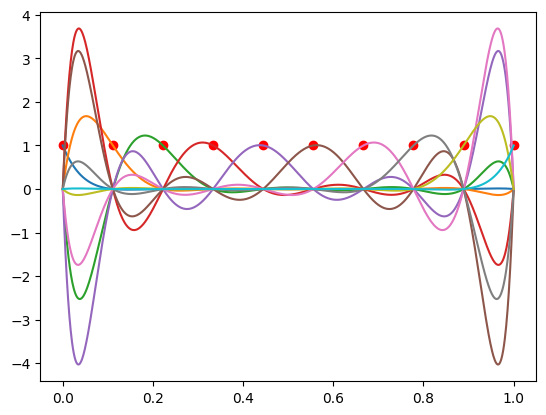

In [ ]:
n = 10
m = 1025
a = 0
b = 1
interpolation_points = np.linspace(a,b,n)
x_plot = np.linspace(a,b,m)
van = lagrange_basis(interpolation_points,n,x_plot)
plot(x_plot,van)
scatter(interpolation_points,[lagrange_basis(interpolation_points,n,interpolation_points)[i,i] for i in range(n)],color='red')

Compute and plot the Lebesgue function using both equispaced and Chebyshev nodes.

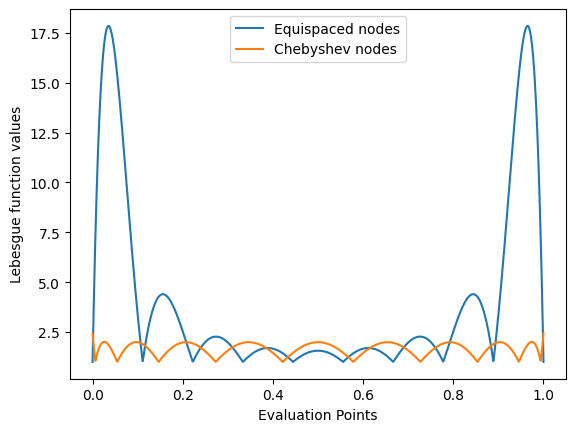

In [ ]:
interpolation_points_chebyshev = (b-a)/(2)*(np.polynomial.chebyshev.Chebyshev.basis(n).roots() + (a+1))
van_chebyshev = lagrange_basis(interpolation_points_chebyshev,n,x_plot)


Lebesgue_equispaced = np.sum(abs(van),axis=1)
Lebesgue_chebyshev = np.sum(abs(van_chebyshev),axis=1)

plot(x_plot,Lebesgue_equispaced,label="Equispaced nodes")
plot(x_plot,Lebesgue_chebyshev,label="Chebyshev nodes")
xlabel('Evaluation Points')
ylabel('Lebesgue function values')
legend()


Plot the function $f(x)$ and the polynomial interpolation using both equispaced and Chebyshev nodes.

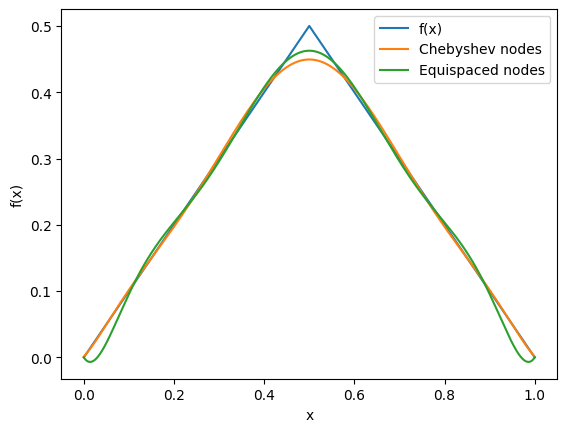

In [ ]:

fx_plot = -1*abs(x_plot-1/2)+1/2
fx_interpolation = -1*abs(interpolation_points-1/2)+1/2
fx_interpolation_chebyshev = -1*abs(interpolation_points_chebyshev-1/2)+1/2

plot(x_plot,fx_plot,label="f(x)")
plot(x_plot,van_chebyshev.dot(fx_interpolation_chebyshev),label="Chebyshev nodes")
plot(x_plot,van.dot(fx_interpolation),label="Equispaced nodes")
xlabel("x")
ylabel("f(x)")
legend()

Compute and plot the error between $f(x)$ and the interpolation as the degree of the polynomial increase using both equispaced and Chebyshev nodes.

Text(0, 0.5, 'Error (log scale)')

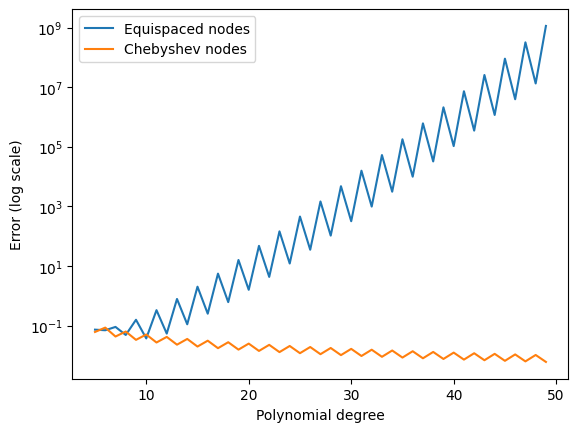

In [ ]:
def my_function(x):
  return 1*abs(x-1/2)+1/2

def runge(x):
  return 1/(1+100*(x-0.5)**2)

error_equispaced = []
error_chebyshev = []
N = range(5,50)
for n in N:
  X = np.linspace(a,b,n)
  X_chebyshev = (b-a)/(2)*(np.polynomial.chebyshev.Chebyshev.basis(n).roots() + (a+1))
  error_equispaced.append(np.max(abs(lagrange_basis(X,n,x_plot).dot(my_function(X))-my_function(x_plot))))
  error_chebyshev.append(np.max(abs(lagrange_basis(X_chebyshev,n,x_plot).dot(my_function(X_chebyshev))-my_function(x_plot))))

plot(N,error_equispaced,label='Equispaced nodes')
plot(N,error_chebyshev,label='Chebyshev nodes')
yscale('log')
legend()
xlabel('Polynomial degree')
ylabel('Error (log scale)')

Compute and plot the Lebesgue function as the number of nodes increase using both equispaced and Chebyshev nodes.

To simplify, we will plot the comparison between the Lebesgue constant using both equispaced and Chebyshev nodes as the number of nodes increases.

The Lebesgue constant is defined as $\Lambda_n = \|\Lambda_n(x)\|_\infty$

Text(0, 0.5, 'Chebyshev constant')

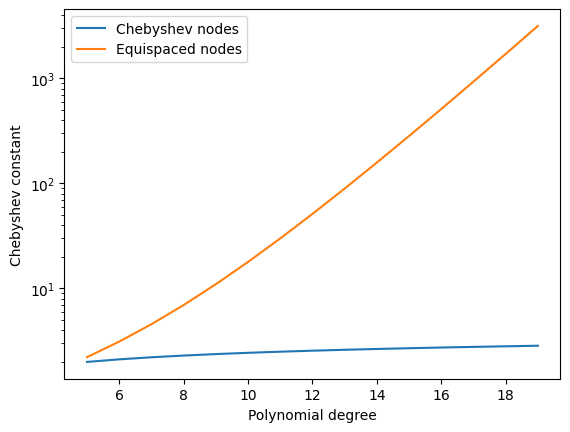

In [ ]:
Leb_const_equispaced = []
Leb_const_chebyshev = []
N = range(5,20)
for n in N:
  X = np.linspace(a,b,n)
  X_chebyshev = (b-a)/(2)*(np.polynomial.chebyshev.Chebyshev.basis(n).roots() + (a+1))
  Leb_const_equispaced.append(np.max(np.sum(abs(lagrange_basis(X,n,x_plot)),axis=1)))
  Leb_const_chebyshev.append(np.max(np.sum(abs(lagrange_basis(X_chebyshev,n,x_plot)),axis=1)))

plot(N,Leb_const_chebyshev,label='Chebyshev nodes')
plot(N,Leb_const_equispaced,label='Equispaced nodes')
yscale('log')
legend()
xlabel('Polynomial degree')
ylabel('Chebyshev constant')



**Second exercise**


---

Consider the following one-dimensional PDE:
$$
-u_{xx}(x) = f(x)\quad\mathrm{ in }\ \Omega = (0, 1)
$$
$$
u(x) = 0, \quad\mathrm{ on }\ \partial\Omega = \{0, 1\}.
$$

Implement a function that given the domain interval, the forcing function, the number of discretization points, returns the matrix $A$ and the right hand side $b$.

Let $x_i$ with $i=1,2,...,N-1$ the internal discretization points. Use the following $4^{th}$ order central finite difference approximation for $i = 2,...,N-2$:
$$u_{xx}(x_i) = \frac{-u_{i-2}+16u_{i-1}-30u_i+16u_{i+1}-u_{i+2}}{12h^2},$$
derive (by using the Taylor series expansion/undetermined coefficients method) and use a $4^{th}$ order forward finite difference approximation for $i=1$ and a $4^{th}$ order backward finite difference approximation scheme for $i = N-1$.

**Solution**

----

To obtain a $4^{th}$ order forward finite difference method for $i=1$ I used the Unknown Coeffieicients Method exploiting the points $X=\{x_1,x_2,x_3,x_4,x_5,x_6\}$.
$$
u_{xx}(x) = ∑_{i=1}^{i=6}{\alpha_i u(x_i)}
$$
Considering the Taylor expansion of the point $u_i$ with respect to $u_1$ we get the following result:
$$
u(x_i)=u(x_1)+(i-1)hu'(x_1)+\frac{(i-1)^2h^2}{2}u''(x_1)+\frac{(i-1)^3h^3}{6}u^{(3)}(x_1)+\frac{(i-1)^4h^4}{24}u^{(4)}(x_1)+\frac{(i-1)^5h^5}{120}u^{(5)}(x_1) + O(h^6)
$$
After having summed up all these Taylor expansions we get the following linear system:
$$
\begin{bmatrix}
    1 & 1 & 1 & 1 & 1 & 1 \\
    0 & 1 & 2 & 3 & 4 & 5 \\
    0 & 1 & 4 & 9 & 16 & 25 \\
    0 & 1 & 8 & 27 & 64 & 125 \\
    0 & 1 & 16 & 81 & 256 & 625 \\
    0 & 1 & 32 & 243 & 1024 & 3125 \\
\end{bmatrix}
\begin{bmatrix}
    \alpha_1 \\
    \alpha_2 \\
    \alpha_3 \\
    \alpha_4 \\
    \alpha_5 \\
    \alpha_6 \\
\end{bmatrix}
=
\begin{bmatrix}
    0 \\
    0 \\
    \frac{2}{h^2} \\
    0 \\
    0 \\
    0 \\
\end{bmatrix}
$$
Which leads us to the following $4^{th}$ order forward finite difference method
$$
u_{xx}(x_1)=\frac{15/4u(x_1)-77/6u(x_2)+107/6u(x_3)-13u(x_4)+61/12u(x_5)-5/6u(x_6)}{h^2}
$$
The same approach leads us to a similar solution for $u_{xx}(x_{N-1})$:
$$
u_{xx}(x_{N-1})=\frac{15/4u(x_{N-1})-77/6u(x_{N-2})+107/6u(x_{N-3})-13u(x_{N-4})+61/12u(x_{N-5})-5/6u(x_{N-6})}{h^2}
$$

In [ ]:
f_exact1 = lambda x : -1*(x**3)/6 +x/8 # [0 - 1/2]
f_exact2 = lambda x : (x**3)/6-(x**2)/2+3*x/8-1/24 # [1/2 - 1]

In [ ]:
def finDif(omega,f,n):
  points = np.linspace(omega[0],omega[1],n+1)
  h = (omega[1]-omega[0])/n
  h2 = h**2
  A = np.zeros((n-1,n-1))

  first_row = [15/(4*h2),-77/(6*h2),107/(6*h2),-13/h2,61/(12*h2),-5/(6*h2)]
  row = [-1/(h2*12),16/(h2*12),-30/(h2*12),16/(h2*12),-1/(h2*12)]

  A[0,0:6] = first_row
  A[1,0:4] = row[1:] # 1/h2 * [16/12,-30/12,16/12,-1/12]
  A[n-3,n-5:] = row[1:][::-1] # 1/h2 * [-1/12,16/12,-30/12,16/12]
  A[n-2,n-7:] = first_row[::-1] # 1/h2 * [-1,4,-5,2]

  k=0
  for i in range(2,n-3):
    for j in range(5):
      A[i,j+k] = row[j]
    k += 1

  b = -f(points[1:n])

  return A, b

Call the function using:

In [ ]:
omega = [0,1]
f = lambda y : -abs(y-0.5*np.ones(len(y))) + 0.5*np.ones(len(y))
n = 15
bc = [0,0] # boundary conditions
A, b = finDif(omega, f, n)

Implement a function that computes the LU of the system matrix $A$

In [ ]:
def LU(A):
    A = A.copy()
    N=len(A)
    for k in range(N-1):
        if (abs(A[k,k]) < 1e-15):
            raise RuntimeError("Null pivot")

        A[k+1:N,k] /= A[k,k]
        for j in range(k+1,N):
            A[k+1:N,j] -= A[k+1:N,k]*A[k,j]

    L=np.tril(A)
    for i in range(N):
        L[i,i]=1.0
    U = np.triu(A)
    return L, U


Implement forward and backward substitution functions to exploit the developed factorization methods to solve the derived linear system of equations.

In [ ]:
def L_solve(L,rhs):
    x = np.zeros_like(rhs)
    N = len(L)

    x[0] = rhs[0]/L[0,0]
    for i in range(1,N):
        x[i] = (rhs[i] - np.dot(L[i, 0:i], x[0:i]))/L[i,i]

    return x

In [ ]:
def U_solve(U,rhs):
  x = np.zeros_like(rhs)
  N = len(U)

  x[-1] = rhs[-1]/U[-1,-1]
  for i in reversed(range(N-1)):
    x[i] = (rhs[i] - np.dot(U[i, i+1:N], x[i+1:N]))/U[i,i]

  return x

Solve the derived linear system using the implemented functions and plot the computed solution:

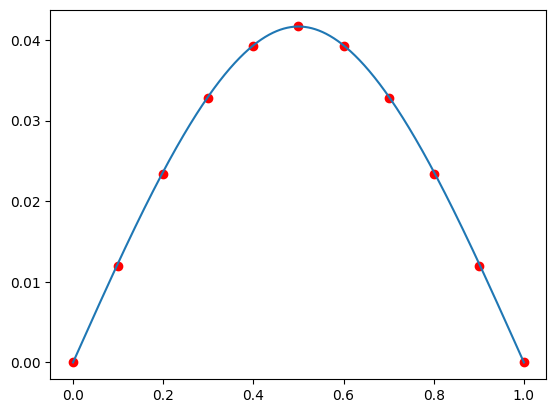

In [ ]:
def LU_solver(A,b):
  L, U = LU(A)
  w = L_solve(L,b)
  u = U_solve(U,w)
  return u

n = 10
bc = [0,0] # boundary conditions
A, b = finDif(omega, f, n)
u = LU_solver(A,b)
u_apx = [0] + u.tolist() + [0]
xx_plot = np.linspace(0,1,n+1)
scatter(xx_plot,u_apx,color="red")

xx_plot_points = np.linspace(0,1,1024)
f_exact0 = np.zeros(len(xx_plot_points))
f_exact0[:(1024)//2] = [f_exact1(x0) for x0 in xx_plot_points[:(1024)//2]]
f_exact0[(1024)//2:] = [f_exact2(x0) for x0 in xx_plot_points[(1024)//2:]]
plot(xx_plot_points,f_exact0)

Produce a plot and a table where you show the decay of the error vs the number of grid points.
(The exact solution for the above problem can be considered the one obtained from the function 'numpy.linalg.solve' avaliable on numpy)

Text(0.5, 0, 'Grid points')

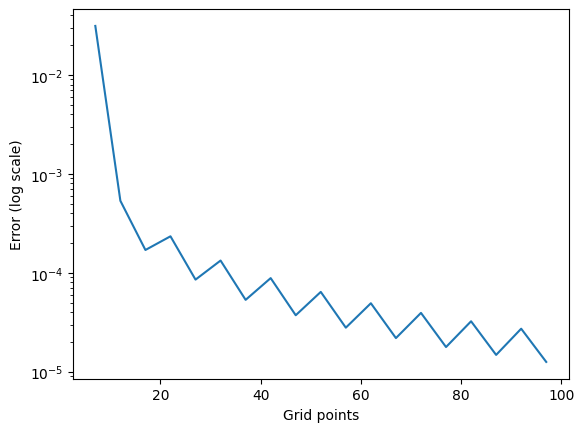

In [ ]:
error = []

for n in range(7,100,5):
  A, b = finDif(omega, f, n)
  points = np.linspace(omega[0],omega[1],n+1)[1:-1]
  u_apx = LU_solver(A,b)
  f_exact = np.zeros(len(points))
  f_exact[:(n-1)//2] = [f_exact1(x0) for x0 in points[:(n-1)//2]]
  f_exact[(n-1)//2:] = [f_exact2(x0) for x0 in points[(n-1)//2:]]
  error.append(np.linalg.norm(f_exact - u_apx, 2))

plot(list(range(7,100,5)),error)
ylabel("Error (log scale)")
yscale('log')
xlabel("Grid points")



Compute the inverse of the matrix A exploiting the derived LU factorization

In [ ]:
def LU_invert(L,U):
  n = L.shape[0]
  id = np.identity(n)
  inv = np.zeros((n,n))
  for i in range(n):
    u = L_solve(L,id[:,i])
    w = U_solve(U,u)
    inv[:,i] = w
  return inv

In [ ]:
A, b = finDif(omega, f, 10)
L, U = LU(A)
A_inv = LU_invert(L,U)
I = A_inv.dot(A)

Exploit the derived LU factorization to compute the condition number of the
system's matrix $A$ using the original problem formulation.

In [ ]:
def condNumb(L,U):
    A_inv = LU_invert(L,U)
    return np.linalg.norm(A)*np.linalg.norm(A_inv)

condNumb(L,U)

2498.1492708892765

Implement a preconditioned Gradient method to solve the original linear system of equations using an iterative method and plot the solution.

5318


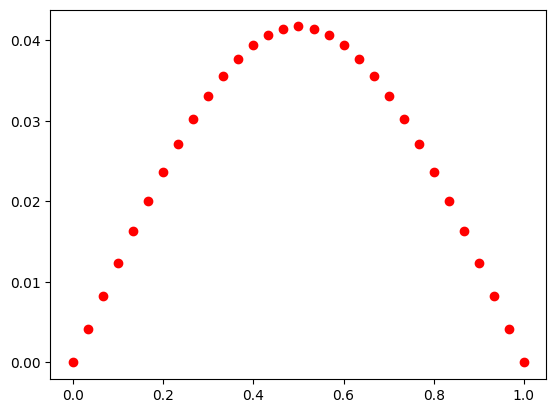

In [ ]:
def gradient(A, b, P, nmax=100000, eps=1e-10):
  n = len(A)
  x = np.zeros_like(b)
  tol = eps+1
  r = b - np.dot(A,x)
  count = 0
  while(tol > eps and count < nmax):
    z = np.linalg.solve(P,r)
    alpha = np.dot(r,z) / (np.dot(z,np.dot(A,z)))
    x = x + alpha*z
    r = r - alpha*np.dot(A,z)
    tol = np.linalg.norm(r,2)
    count = count + 1
  print(count)
  return x


n = 30
bc = [0,0] # boundary conditions
A, b = finDif(omega, f, n)
u = gradient(A,b,np.identity(len(A)))
u_apx = [0] + u.tolist() + [0]
xx_plot = np.linspace(0,1,n+1)
scatter(xx_plot,u_apx,color="red")

**Third exercise**


---

Consider the following time dependent variation of the PDE starting from the orginal problem formulation:
$$
u'(t)-k(x)u_{xx} = \alpha(t)f(x)
$$

for $t\in [0,T]$, with $u(t=0)=0$, $k(x) = x$, $\alpha(t) = \cos^2(t)$ and $T = 4\pi$

Use the same finite difference scheme to derive the semi-discrete formulation and solve it using a forward Euler's method for the first time step and a backward differencing formula of second order for the others time steps.

Plot the time dependent solution at $x = 1/3$, $x = 1/2$, $x=1$.


**Solution**

----

Using the same approach as exercise 2, we compute a backward differencing formula of order two for $u^{'}_i$, with $i>1$.

$$
u'_i≈\frac{3u_i-4u_{i-1}+u_{i-2}}{2h_t} \quad \forall i>1
$$

Consequently, we can combine this formula with the exercise 2 one to set up a linear system that allows us to compute $u_{ij} \space \forall i,j$ by solving it.

In particular, we ask $u'(t_i)-k(x_j)u_{xx} = \alpha(t_i)f(x_j)$ for the inner points and the points for which $t=4π$ of our discretized domain; here we substitute the derivatives with the suitable formulas depending on $i$ and $j$.

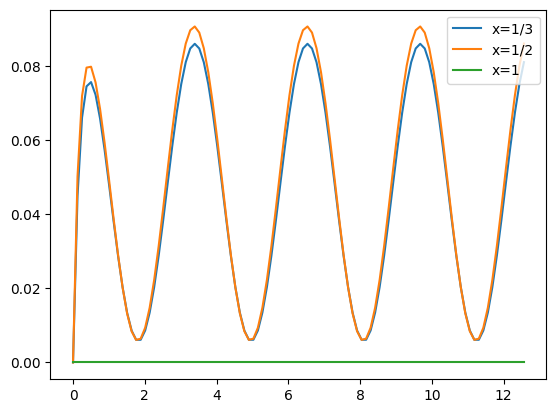

In [ ]:
alpha = lambda t : math.cos(t)**2
f = lambda y : -1*abs(y-0.5) + 0.5
k = lambda x : x
T = 4 * math.pi
omega_t = [0,T]
omega_x = [0,1]
N_x = 100
N_t = 100
h_x = (omega_x[1] - omega_x[0])/N_x
h_t = (omega_t[1] - omega_t[0])/N_t
x = np.linspace(omega_x[0],omega_x[1],N_x+1)
t = np.linspace(omega_t[0],omega_t[1],N_t+1)
N = (N_x+1)*(N_t+1)

A = np.zeros((N,N))
b = np.zeros(N)

for i in range(0,N_t+1):
  for j in range(0,N_x+1):
    if i == 0 or j == 0 or j == N_x:
      b[(i)*(N_x+1) + j] = 0
      A[i*(N_x+1) + j,i*(N_x+1) + j] += 1
    else: # i > 0 and 0 < j < N_x
      b[(i)*(N_x+1) + j] = alpha(t[i])*f(x[j])

      if i == 1:
        A[i*(N_x+1) + j,(i+1)*(N_x+1) + j] += 1/h_t
        A[i*(N_x+1) + j,i*(N_x+1) + j] += -1/h_t
      else: # i > 1
        A[i*(N_x+1) + j,i*(N_x+1) + j] += 3/(2*h_t)
        A[i*(N_x+1) + j,(i-1)*(N_x+1) + j] += -4/(2*h_t)
        A[i*(N_x+1) + j,(i-2)*(N_x+1) + j] += 1/(2*h_t)
      if j == 1:
        A[i*(N_x+1) + j,i*(N_x+1) + j] += -1*x[j]*15/(4*h_x**2)
        A[i*(N_x+1) + j,i*(N_x+1) + (j+1)] += -1*x[j]*-77/(6*h_x**2)
        A[i*(N_x+1) + j,i*(N_x+1) + (j+2)] += -1*x[j]*107/(6*h_x**2)
        A[i*(N_x+1) + j,i*(N_x+1) + (j+3)] += -1*x[j]*-13/h_x**2
        A[i*(N_x+1) + j,i*(N_x+1) + (j+4)] += -1*x[j]*61/(12*h_x**2)
        A[i*(N_x+1) + j,i*(N_x+1) + (j+5)] += -1*x[j]*-5/(6*h_x**2)
      elif j == N_x-1:
        A[i*(N_x+1) + j,i*(N_x+1) + j] += -1*x[j]*15/(4*h_x**2)
        A[i*(N_x+1) + j,i*(N_x+1) + (j-1)] += -1*x[j]*-77/(6*h_x**2)
        A[i*(N_x+1) + j,i*(N_x+1) + (j-2)] += -1*x[j]*107/(6*h_x**2)
        A[i*(N_x+1) + j,i*(N_x+1) + (j-3)] += -1*x[j]*-13/h_x**2
        A[i*(N_x+1) + j,i*(N_x+1) + (j-4)] += -1*x[j]*61/(12*h_x**2)
        A[i*(N_x+1) + j,i*(N_x+1) + (j-5)] += -1*x[j]*-5/(6*h_x**2)
      elif j > 1 and j < N_x-1:
        A[i*(N_x+1) + j,i*(N_x+1) + (j-2)] += -1*x[j]*-1/(12*(h_x**2))
        A[i*(N_x+1) + j,i*(N_x+1) + (j-1)] += -1*x[j]*16/(12*(h_x**2))
        A[i*(N_x+1) + j,i*(N_x+1) + j] += -1*x[j]*-30/(12*(h_x**2))
        A[i*(N_x+1) + j,i*(N_x+1) + (j+1)] += -1*x[j]*16/(12*(h_x**2))
        A[i*(N_x+1) + j,i*(N_x+1) + (j+2)] += -1*x[j]*-1/(12*(h_x**2))

u = np.linalg.solve(A,b)

plot(t,u[33::N_x+1],label="x=1/3")
plot(t,u[50::N_x+1],label="x=1/2")
plot(t,u[100::N_x+1],label="x=1")
legend()